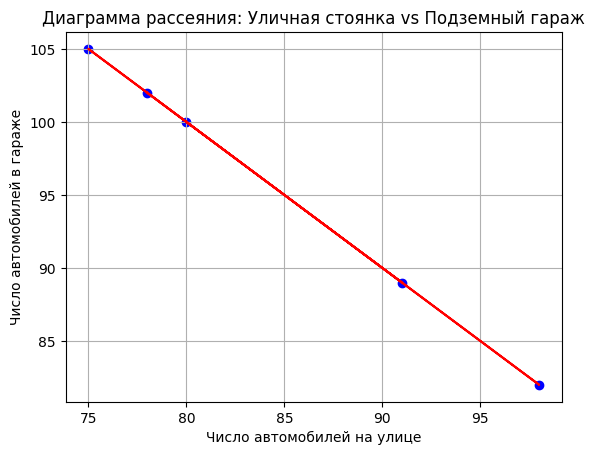

-0.9999999999999997


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Данные по числу автомобилей
days = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница']
street = np.array([80, 98, 75, 91, 78])
garage = np.array([100, 82, 105, 89, 102])

# Расчет корреляции Пирсона
correlation, _ = pearsonr(street, garage)

# Построение диаграммы рассеяния
plt.scatter(street, garage, color='blue')
plt.title('Диаграмма рассеяния: Уличная стоянка vs Подземный гараж')
plt.xlabel('Число автомобилей на улице')
plt.ylabel('Число автомобилей в гараже')

# Добавление трендовой линии
m, b = np.polyfit(street, garage, 1)
plt.plot(street, m*street + b, color='red')

# Показать график
plt.grid(True)
plt.show()

print(correlation)

            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009
          number  orbital_period        mass    distance         year
count  498.00000      498.000000  498.000000  498.000000   498.000000
mean     1.73494      835.778671    2.509320   52.068213  2007.377510
std      1.17572     1469.128259    3.636274   46.596041     4.167284
min      1.00000        1.328300    0.003600    1.350000  1989.000000
25%      1.00000       38.272250    0.212500   24.497500  2005.000000
50%      1.00000      357.000000    1.245000   39.940000  2009.000000
75%      2.00000      999.600000    2.867500   59.332500  2011.000000
max      6.00000    17337.500000   25.000000

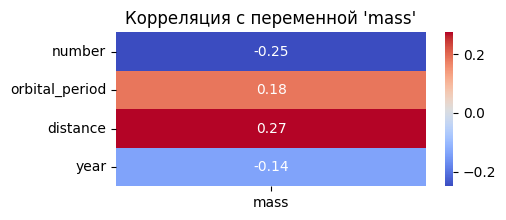

Наиболее коррелирующая переменная с mass: distance
Наклон (slope): 0.02138891969920012
Сдвиг (intercept): 1.3956372166010678
MSE: 12.204645062688268


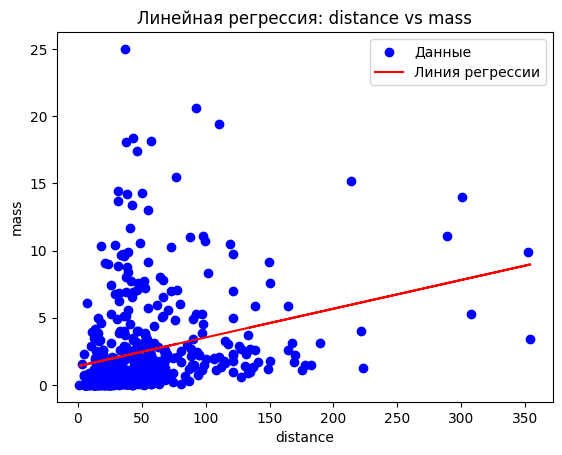

In [19]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 2. Найти и выгрузить данные
planets = sns.load_dataset('planets')

# Вывести первые строки данных
print(planets.head())

# Провести предобработку (удаление пропусков)
planets_cleaned = planets.dropna()

# Описание признаков
print(planets_cleaned.describe())

# 2.1. Построить корреляционную матрицу по одной целевой переменной (например, по массе планеты - 'mass')
correlation_matrix = planets_cleaned.corr(numeric_only=True)

# Вывести корреляционную матрицу
print("Корреляционная матрица:")
print(correlation_matrix)

# Выбор целевой переменной (например, 'mass')
target_variable = 'mass'

# Построение корреляционной матрицы по одной переменной
corr_with_target = correlation_matrix[[target_variable]].drop(target_variable)

# Визуализация с использованием тепловой карты
plt.figure(figsize=(5, len(corr_with_target) // 2))
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', cbar=True)
plt.title(f"Корреляция с переменной '{target_variable}'")
plt.show()

# Наиболее коррелирующая переменная с массой планеты
target_variable = 'mass'
most_correlated_feature = correlation_matrix[target_variable].drop(target_variable).idxmax()
print(f"Наиболее коррелирующая переменная с {target_variable}: {most_correlated_feature}")

# 2.2. Реализовать регрессию вручную
X = planets_cleaned[most_correlated_feature].values
Y = planets_cleaned[target_variable].values

# Добавим столбец с единицами для сдвига (intercept)
X_with_intercept = np.c_[np.ones(X.shape[0]), X]

# Решение уравнения для коэффициентов линейной регрессии
beta = np.linalg.inv(X_with_intercept.T.dot(X_with_intercept)).dot(X_with_intercept.T).dot(Y)

# Коэффициенты наклона и сдвига
slope = beta[1]
intercept = beta[0]

print(f"Наклон (slope): {slope}")
print(f"Сдвиг (intercept): {intercept}")

# Предсказания модели
Y_pred = X_with_intercept.dot(beta)

# Вычисление MSE
mse = mean_squared_error(Y, Y_pred)
print(f"MSE: {mse}")

# 2.3. Визуализировать регрессию на графике
plt.scatter(X, Y, color='blue', label='Данные')
plt.plot(X, Y_pred, color='red', label='Линия регрессии')
plt.xlabel(most_correlated_feature)
plt.ylabel(target_variable)
plt.title(f'Линейная регрессия: {most_correlated_feature} vs {target_variable}')
plt.legend()
plt.show()

In [8]:
import pandas as pd

# Загрузка данных из 'insurance.csv'
data = pd.read_csv('insurance.csv')

# Просмотр первых строк датасета
print("Первые строки датасета:")
print(data.head())

# Предобработка: проверим на пропуски и типы данных
print("\nТипы данных:")
print(data.dtypes)

print("\nКоличество пропусков в данных:")
print(data.isnull().sum())

# Вывод списка уникальных регионов
unique_regions = data['region'].unique()
print("\nУникальные регионы:")
print(unique_regions)

Первые строки датасета:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Типы данных:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Количество пропусков в данных:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Уникальные регионы:
['southwest' 'southeast' 'northwest' 'northeast']


In [9]:
from scipy import stats

# Группируем данные по регионам
regions = data['region'].unique()
bmi_by_region = [data['bmi'][data['region'] == region] for region in regions]

# Выполнение однофакторного ANOVA теста
anova_result = stats.f_oneway(*bmi_by_region)

# Вывод результата
print("Результат однофакторного ANOVA теста (через Scipy):")
print(f"F-статистика: {anova_result.statistic:.4f}, p-значение: {anova_result.pvalue:.4f}")


Результат однофакторного ANOVA теста (через Scipy):
F-статистика: 39.4951, p-значение: 0.0000


In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Подготовка данных для ANOVA теста с помощью statsmodels
model = ols('bmi ~ C(region)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Вывод результата
print("\nРезультат однофакторного ANOVA теста (через statsmodels):")
print(anova_table)



Результат однофакторного ANOVA теста (через statsmodels):
                 sum_sq      df          F        PR(>F)
C(region)   4055.880631     3.0  39.495057  1.881839e-24
Residual   45664.319755  1334.0        NaN           NaN


In [12]:
from scipy import stats
import itertools

# Генерация всех пар регионов
region_pairs = list(itertools.combinations(unique_regions, 2))

# Словарь для хранения результатов
results = {}

# Выполнение t-критерия Стьюдента для каждой пары регионов
for region1, region2 in region_pairs:
    bmi1 = data['bmi'][data['region'] == region1]
    bmi2 = data['bmi'][data['region'] == region2]
    t_stat, p_value = stats.ttest_ind(bmi1, bmi2)
    results[(region1, region2)] = (t_stat, p_value)

# Коррекция p-значений с помощью поправки Бонферрони
alpha = 0.05
num_tests = len(region_pairs)
bonferroni_correction = alpha / num_tests

# Вывод результатов с поправкой Бонферрони
print("\nРезультаты t-критерия Стьюдента с поправкой Бонферрони:")
for (region1, region2), (t_stat, p_value) in results.items():
    significant = p_value < bonferroni_correction
    print(f"{region1} vs {region2} - t-статистика: {t_stat:.4f}, p-значение: {p_value:.4f}, "
          f"значимость (с учетом Бонферрони): {significant}")


Результаты t-критерия Стьюдента с поправкой Бонферрони:
southwest vs southeast - t-статистика: -5.9084, p-значение: 0.0000, значимость (с учетом Бонферрони): True
southwest vs northwest - t-статистика: 3.2844, p-значение: 0.0011, значимость (с учетом Бонферрони): True
southwest vs northeast - t-статистика: 3.1169, p-значение: 0.0019, значимость (с учетом Бонферрони): True
southeast vs northwest - t-статистика: 9.2565, p-значение: 0.0000, значимость (с учетом Бонферрони): True
southeast vs northeast - t-статистика: 8.7909, p-значение: 0.0000, значимость (с учетом Бонферрони): True
northwest vs northeast - t-статистика: 0.0603, p-значение: 0.9519, значимость (с учетом Бонферрони): False



Результаты пост-хок теста Тьюки:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest   0.0263 0.9999 -1.1552  1.2078  False
northeast southeast   4.1825    0.0   3.033   5.332   True
northeast southwest   1.4231 0.0107  0.2416  2.6046   True
northwest southeast   4.1562    0.0  3.0077  5.3047   True
northwest southwest   1.3968 0.0127  0.2162  2.5774   True
southeast southwest  -2.7594    0.0 -3.9079 -1.6108   True
----------------------------------------------------------


<Figure size 1000x600 with 0 Axes>

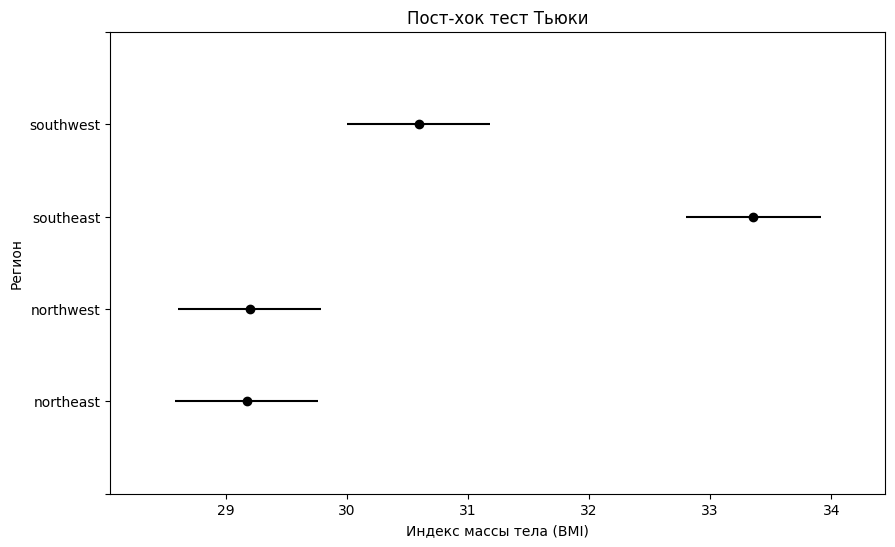

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Пост-хок тест Тьюки
tukey_result = pairwise_tukeyhsd(endog=data['bmi'], groups=data['region'], alpha=0.05)

# Вывод результатов теста Тьюки
print("\nРезультаты пост-хок теста Тьюки:")
print(tukey_result)

# Визуализация результатов теста Тьюки
plt.figure(figsize=(10, 6))
tukey_result.plot_simultaneous()
plt.title("Пост-хок тест Тьюки")
plt.xlabel("Индекс массы тела (BMI)")
plt.ylabel("Регион")
plt.show()


In [14]:
# Двухфакторный ANOVA тест
model_2way = ols('bmi ~ C(region) * C(sex)', data=data).fit()
anova_table_2way = sm.stats.anova_lm(model_2way, typ=2)

# Вывод результата
print("\nРезультат двухфакторного ANOVA теста:")
print(anova_table_2way)


Результат двухфакторного ANOVA теста:
                        sum_sq      df          F        PR(>F)
C(region)          4034.975135     3.0  39.398134  2.163195e-24
C(sex)               86.007035     1.0   2.519359  1.126940e-01
C(region):C(sex)    174.157808     3.0   1.700504  1.650655e-01
Residual          45404.154911  1330.0        NaN           NaN



Результаты пост-хок теста Тьюки для двухфакторного ANOVA:
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
northeast female   northeast male  -0.2998 0.9998 -2.2706  1.6711  False
northeast female northwest female  -0.0464    1.0 -2.0142  1.9215  False
northeast female   northwest male  -0.2042    1.0 -2.1811  1.7728  False
northeast female southeast female   3.3469    0.0    1.41  5.2839   True
northeast female   southeast male   4.6657    0.0  2.7634   6.568   True
northeast female southwest female   0.7362 0.9497 -1.2377    2.71  False
northeast female   southwest male   1.8051 0.1007 -0.1657   3.776  False
  northeast male northwest female   0.2534 0.9999 -1.7083  2.2152  False
  northeast male   northwest male   0.0956    1.0 -1.8752  2.0665  False
  northeast male southeast female   3.6467    0.0  1.7159  5.5775

<Figure size 1000x600 with 0 Axes>

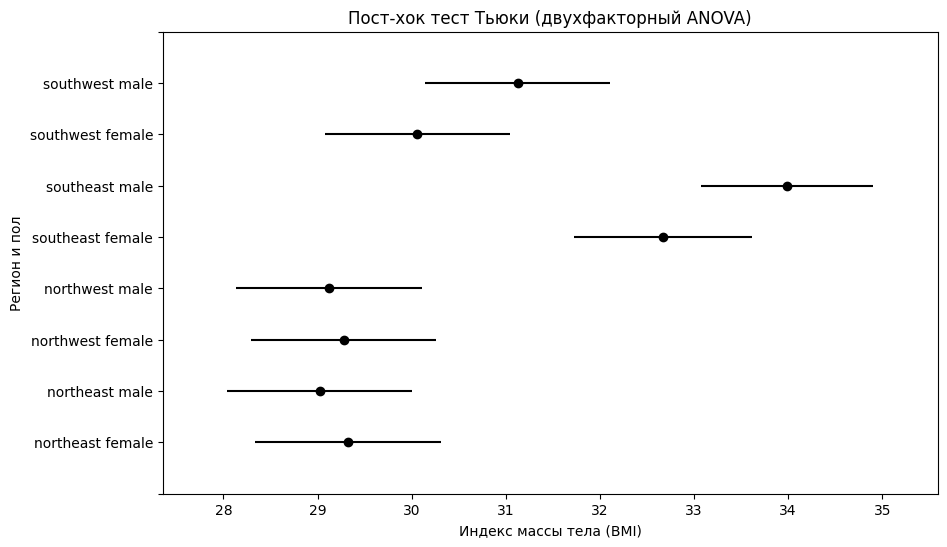

In [15]:
# Пост-хок тест Тьюки для двухфакторного ANOVA
tukey_result_2way = pairwise_tukeyhsd(endog=data['bmi'], groups=data[['region', 'sex']].apply(lambda x: ' '.join(x), axis=1), alpha=0.05)

# Вывод результатов теста Тьюки
print("\nРезультаты пост-хок теста Тьюки для двухфакторного ANOVA:")
print(tukey_result_2way)

# Визуализация результатов теста Тьюки
plt.figure(figsize=(10, 6))
tukey_result_2way.plot_simultaneous()
plt.title("Пост-хок тест Тьюки (двухфакторный ANOVA)")
plt.xlabel("Индекс массы тела (BMI)")
plt.ylabel("Регион и пол")
plt.show()
